In [8]:
import numpy as np
import pandas as pd

from imp import reload
import stochasticgrowth_eventline as sge
sge = reload(sge)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8,6)

import glob,os

In [10]:
def LMSQ(x,y):
    n   = len(x)
    sx  = np.sum(x)
    sy  = np.sum(y)
    sxx = np.dot(x,x)
    sxy = np.dot(x,y)
    syy = np.dot(y,y)
    
    denom  = (n*sxx-sx*sx)
    b      = (n*sxy - sx*sy)/denom
    a      = (sy-b*sx)/n
    estim  = np.array([a,b],dtype=np.float)

    sigma2 = syy + n*a*a + b*b*sxx + 2*a*b*sx - 2*a*sy - 2*b*sxy
    cov    = sigma2 / denom * np.array([[sxx,-sx],[-sx,n]],dtype=np.float)

    return estim,cov

In [22]:
datadir = '/home/lukas/projects/growthratedifferences/simulations/190920_sample/newsim/'
datafiles = glob.glob(datadir + 'out.n????.r???')


<IPython.core.display.Javascript object>


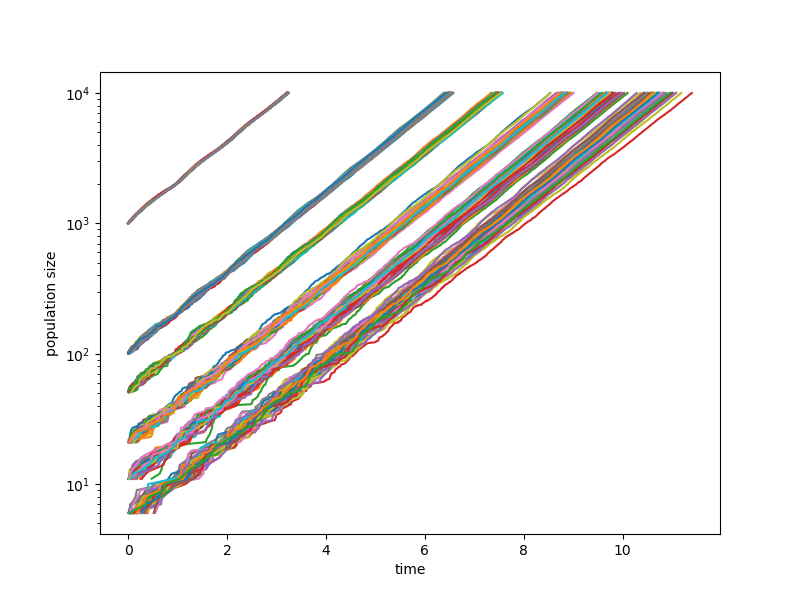

In [32]:
for filename in datafiles:
    d = pd.read_csv(filename,sep = ' ')
    plt.plot(d['time'],d['#populationsize'])

plt.yscale('log')
plt.ylabel('population size')
plt.xlabel('time')
plt.show()

In [25]:
def initialsizeFN(filename):
    return int(filename.split('.')[1][1:])

growthrates = dict()

for filename in datafiles:
    d = pd.read_csv(filename,sep = ' ')
    initialsize = initialsizeFN(filename)
    if not initialsize in growthrates.keys():
        growthrates[initialsize] = list()
    
    gr_fit,gr_cov = LMSQ(d['time'],np.log(d['#populationsize']))
    
    growthrates[initialsize].append(gr_fit[1])
    
    

<IPython.core.display.Javascript object>


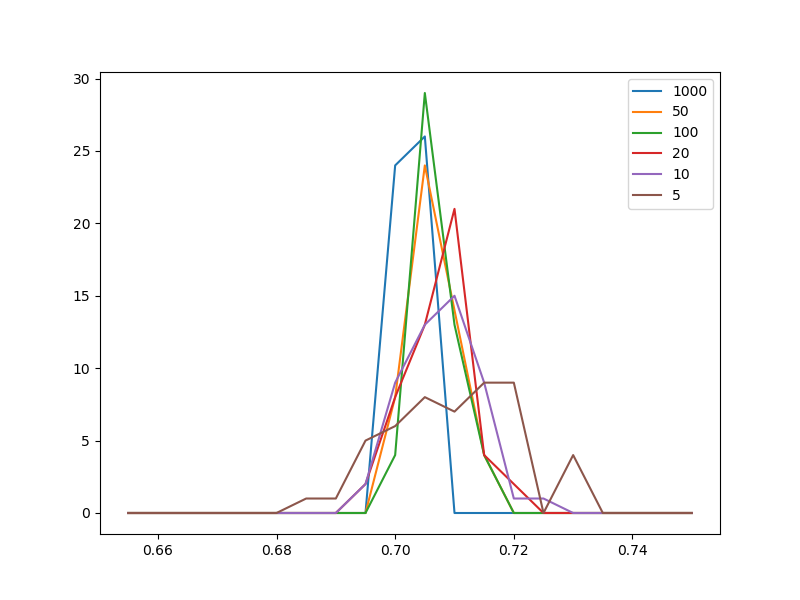

In [36]:
lgnd = list()
#print(growthrates.keys())

for initialsize in growthrates.keys():
    #print(initialsize)
    #print(growthrates[initialsize])
    h,b = np.histogram(growthrates[initialsize],range = (0.65,0.75),bins = 20)
    b = b[:-1] + np.diff(b)
    
    plt.plot(b,h)
    lgnd.append(str(initialsize))

plt.legend(lgnd)
plt.show()

<IPython.core.display.Javascript object>


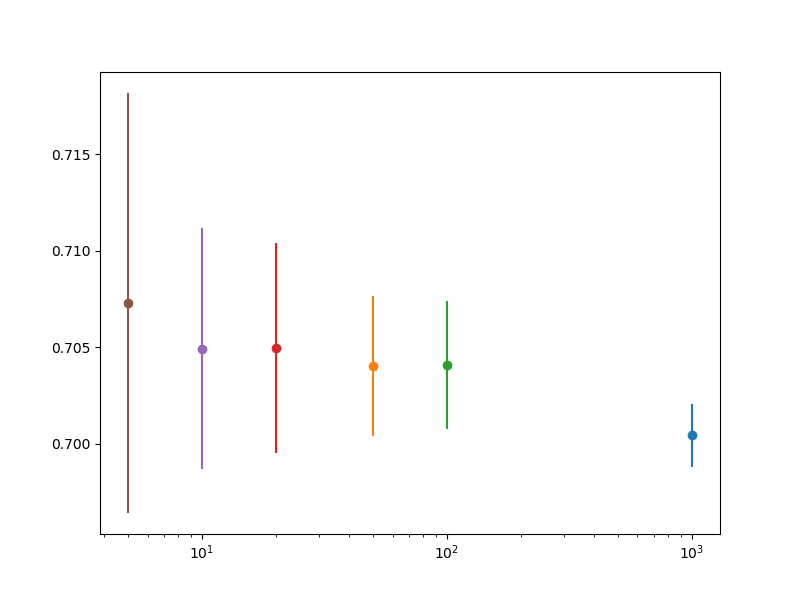

In [41]:
for initialsize in growthrates.keys():
    mean = np.mean(growthrates[initialsize])
    var  = np.var(growthrates[initialsize])
    
    plt.errorbar([initialsize],[mean],yerr = [np.sqrt(var)],marker = 'o')
plt.xscale('log')
plt.show()

In [57]:
pop = sge.Population(inheritancematrix = [[.9,-.5],[0,.8]],noiseamplitude = .01)
pop.growth(divisionevents = 1000)

<IPython.core.display.Javascript object>


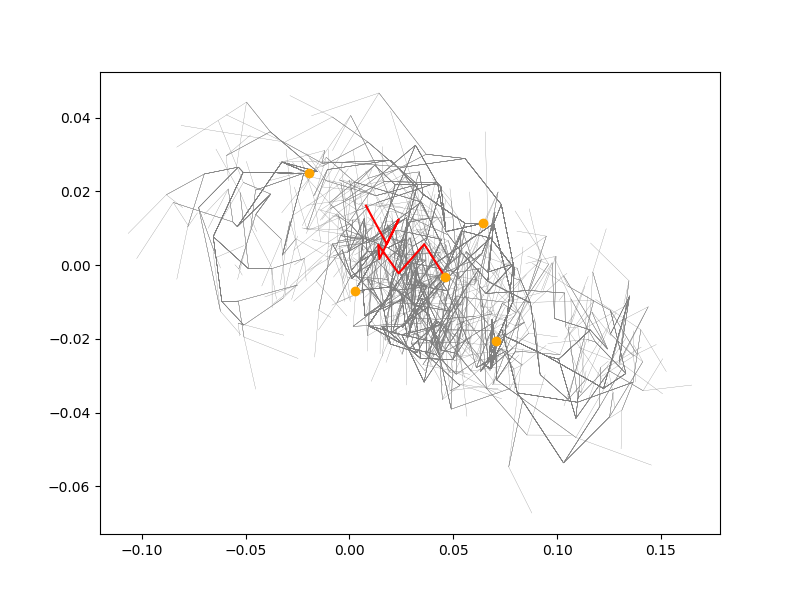

In [58]:
for idx in range(1,1000):

    ld = pop.events.LineageData(idx)
    plt.plot(ld['parentstate0'],ld['parentstate1'],c = 'gray',linewidth = .2)

ld = pop.events.LineageData(901)
plt.plot(ld['parentstate0'],ld['parentstate1'],c = 'red')

founders = pop.events.FounderPopulationData()

plt.scatter(founders['parentstate0'],founders['parentstate1'],marker = 'o',c='orange',zorder = 100)


In [53]:
np.linalg.eig([[.2,-.5],[0,.2]])

print([[.2,-.5],[0,.2]])

[[0.2, -0.5], [0, 0.2]]


In [45]:
def itervector(x,A = np.eye(2),noiselevel = None,steps = 1):
    for s in range(steps):
        x = np.dot(A,x)
        if not noiselevel is None:
            x += noiselevel * np.random.normal(size = 2)
    return x



[[ 0.4        -0.61553671]
 [-0.06498394  0.4       ]]


<IPython.core.display.Javascript object>


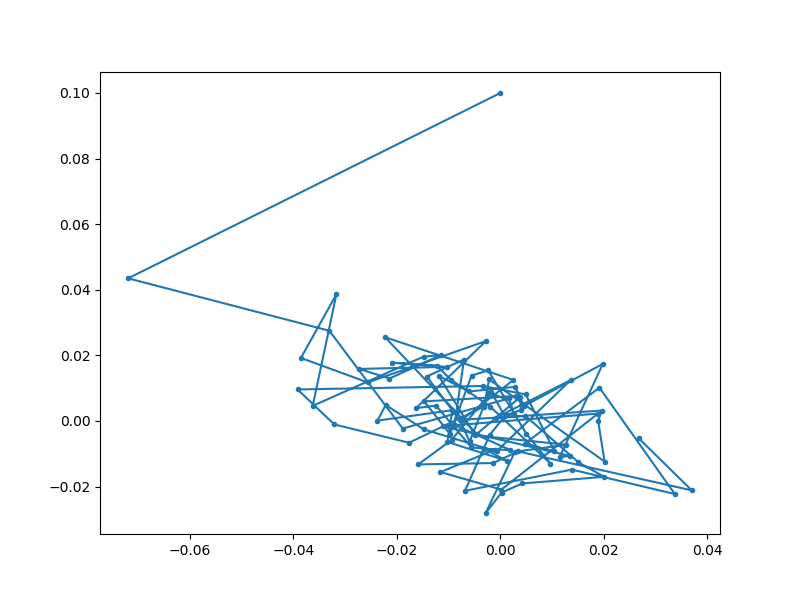

In [70]:
A = sge.ConstructMatrix(eigenvalues = (.2,.6),theta =(-.2,.2))
print(A)
x = np.array([0,.1])
r = np.array([x])
for i in range(100):
    x = itervector(x,A = A, noiselevel = .01)
    r = np.concatenate([r,[x]],axis = 0)
plt.plot(r[:,0],r[:,1],marker = '.')

In [2]:
sge.ConstructMatrix(eigenvalues = [.3,.9],theta=[0,.3])

array([[0.9       , 0.        ],
       [0.19495182, 0.3       ]])

In [4]:
for i[1/np.log(.3),1/np.log(.9)]

[-0.8305835450825373, -9.491221581029905]

In [9]:
pop = list()
for i in range(50):
    print(i)
    pop.append(sge.Population(initialsize = 20))
    pop[-1].growth(divisionevents = 10000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [6]:
pop.data

,#populationsize,divisiontime,ID,parentID,parentstate0,parentstate1,time
0,6,0.969592,0,-1,1.706421,0.895967,0.068854
1,7,1.005714,3,-1,1.119537,0.816925,0.162300
2,8,1.063429,4,-1,-0.012898,0.557427,0.818778
3,9,1.038452,2,-1,-0.337256,0.112550,0.828986
4,10,1.039379,1,-1,-0.557145,-0.029611,0.890438
5,11,0.844877,5,0,2.236863,0.145482,0.913731
6,12,0.839176,7,3,1.551241,-0.374476,1.001475
7,13,0.996273,6,0,1.287823,0.847777,1.065127
8,14,1.106228,8,3,0.874016,1.546286,1.268528
9,15,0.751130,16,5,2.218107,-0.704268,1.664861


<IPython.core.display.Javascript object>


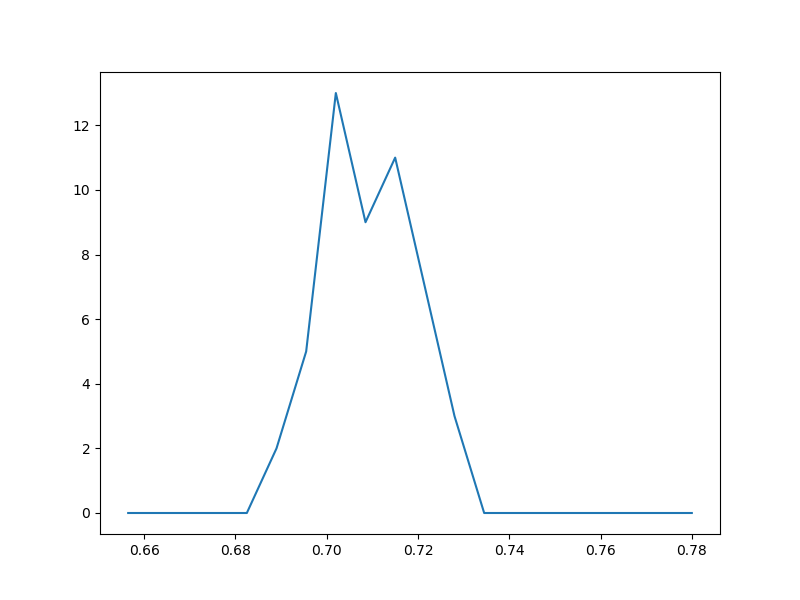

In [21]:
#grlist=list()
#for i in range(20,50):
#    print(i)
#    data = pop[i].data
#    grfit,cov = LMSQ(data['time'],np.log(data['#populationsize']))
#    grlist.append(grfit[1])

h,b=np.histogram(grlist,range=(0.65,.78),bins=20)
b=b[:-1]+np.diff(b)
plt.plot(b,h)

In [23]:
pop2 = list()
pop2data = list()
for i in range(50):
    print(i)
    pop2.append(sge.Population(initialsize = 20,eigenvalues = (.5,.6),beta = .125))
    pop2[-1].growth(divisionevents = 10000)
    pop2data.append(pop2[-1].data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [25]:
gr2list= list()
for i in range(50):
    grfit,cov = LMSQ(pop2data[i]['time'],np.log(pop2data[i]['#populationsize']))
    print(grfit)
    gr2list.append(grfit[1])

[1.59097194 0.69638602]
[1.54446469 0.69987543]
[1.61824497 0.70183374]
[1.58308322 0.69969991]
[1.6795616  0.70267747]
[1.53952177 0.702824  ]
[1.69383955 0.69914619]
[1.86712652 0.70624375]
[1.42896946 0.69921371]
[1.57437546 0.70399417]
[1.62799372 0.70522924]
[1.69063785 0.70040221]
[1.8142929  0.70495408]
[1.64611775 0.70298775]
[1.70689899 0.70185181]
[1.78312493 0.70274061]
[1.8382884  0.70237772]
[1.55956171 0.70142278]
[1.62432429 0.701263  ]
[1.61604438 0.70395558]
[1.73476893 0.70116633]
[1.7418101  0.70323131]
[1.50353791 0.70109114]
[1.43460998 0.69741275]
[1.91671003 0.70505696]
[1.65727448 0.69990199]
[1.70569508 0.70194356]
[1.80465827 0.70226836]
[1.68598135 0.70081352]
[1.54684384 0.70043472]
[1.56218427 0.70207385]
[1.60831943 0.70168109]
[1.61797304 0.70247048]
[1.61433909 0.69793289]
[1.62207001 0.70212566]
[1.81525638 0.70155861]
[1.46176266 0.70111066]
[1.55344943 0.70490227]
[1.81409923 0.70771587]
[1.81611541 0.71046031]
[1.72407062 0.69616012]
[1.73895658 0.70

[0.6963860234218706, 0.6998754306064858, 0.7018337441519146, 0.6996999086544893, 0.7026774694940601, 0.7028240048193096, 0.6991461887432474, 0.7062437462874609, 0.6992137083398121, 0.7039941722372348, 0.7052292371531129, 0.70040220998297, 0.7049540821539316, 0.7029877513787257, 0.7018518078673122, 0.7027406055172762, 0.7023777202763329, 0.7014227804639439, 0.7012629966687217, 0.7039555795275285, 0.7011663278541992, 0.7032313103266614, 0.7010911434646857, 0.6974127534014524, 0.7050569589760518, 0.6999019935492493, 0.7019435600686298, 0.7022683571528061, 0.7008135207129533, 0.7004347193751808, 0.7020738542111993, 0.7016810943963836, 0.7024704844022236, 0.6979328921242136, 0.7021256561658952, 0.7015586121501036, 0.7011106580016744, 0.7049022737813049, 0.70771587088878, 0.710460308698118, 0.6961601150234806, 0.7041236912988363, 0.7035519870542514, 0.7030108790822772, 0.7037175030319263, 0.7016914451100562, 0.6983200580682019, 0.7016057755520801, 0.7000653175849295, 0.704651201965276]


<IPython.core.display.Javascript object>


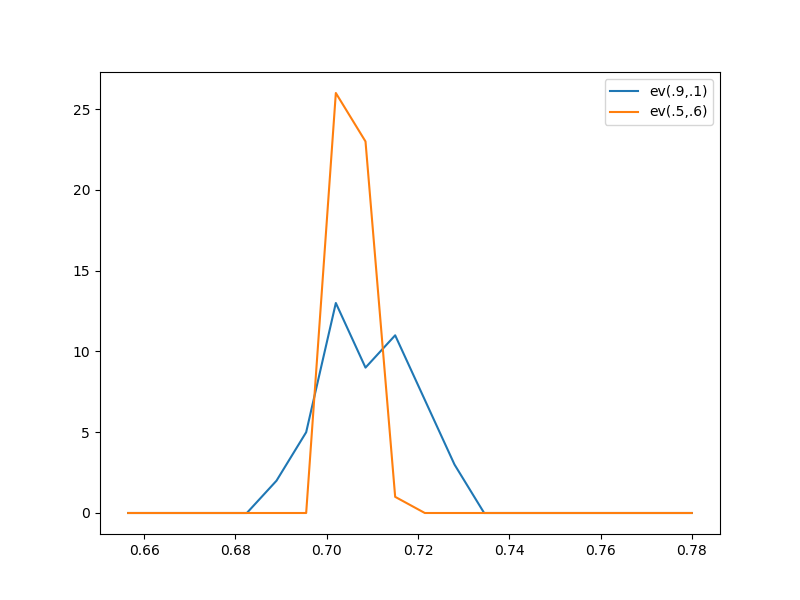

In [28]:
h1,b1=np.histogram(grlist,range=(0.65,.78),bins=20)
b1=b1[:-1]+np.diff(b1)
plt.plot(b1,h1)

h2,b2=np.histogram(gr2list,range=(0.65,.78),bins=20)
b2=b2[:-1]+np.diff(b2)
plt.plot(b2,h2)

plt.legend(['ev(.9,.1)','ev(.5,.6)'])